ковариация мтарицы $X$считается как $X^T*X$

In [1]:
import numpy as np

x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))
print (X)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]
 [ 4.33467958  7.69090935  4.70365503  7.25144086  9.51535339 11.93066275
  17.81378834 14.49497393 20.92559497 23.66305209]]


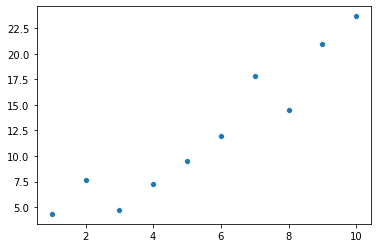

In [2]:
import seaborn as sns
sns.scatterplot(X[0],X[1])

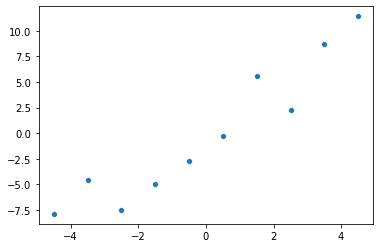

In [3]:
x_mean = x.mean()
y_mean = y.mean()

X_centered = (x - x_mean, y - y_mean)
m = (x_mean, y_mean)

sns.scatterplot(X_centered[0], X_centered[1])

In [4]:
cov_mat = np.cov(X_centered)

In [5]:
print(cov_mat)

[[ 9.16666667 19.42539435]
 [19.42539435 46.05189447]]


In [6]:
eig = np.linalg.eig(cov_mat)

In [7]:
eig[0]

array([ 0.82353897, 54.39502217])

In [8]:
eig[1]

array([[-0.91883719, -0.39463683],
       [ 0.39463683, -0.91883719]])

In [9]:
_, vecs = np.linalg.eig(cov_mat)
v = -vecs[:,1]
X_new = np.dot(v,X_centered)
print (X_new)

[-9.03259507 -5.55412952 -7.90429305 -5.16865586 -2.693852   -0.07993912
  5.72033226  3.065519    9.36884957 12.27876379]


In [10]:
X_centered

(array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 array([-7.89773145, -4.54150168, -7.528756  , -4.98097017, -2.71705763,
        -0.30174828,  5.58137731,  2.2625629 ,  8.69318394, 11.43064106]))

In [11]:
X_old2 = np.reshape(X_new, (10,1))

In [12]:
x_old = np.dot(X_old2, np.reshape(v, (1,2)))

In [13]:
X_old = x_old + m

In [14]:
np.dot(X_new[-1], v) + m

array([10.34565238, 23.5145958 ])

In [15]:
res = X_old - np.reshape(X, (10,2))
res.sum(axis=0)

array([-27.2930713,  27.2930713])

## PCA через sklearn 

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_PCA = pca.fit_transform(X.transpose())

In [17]:
X_PCA

array([[-9.03259507],
       [-5.55412952],
       [-7.90429305],
       [-5.16865586],
       [-2.693852  ],
       [-0.07993912],
       [ 5.72033226],
       [ 3.065519  ],
       [ 9.36884957],
       [12.27876379]])

In [18]:
X_new.reshape((-1,1))

array([[-9.03259507],
       [-5.55412952],
       [-7.90429305],
       [-5.16865586],
       [-2.693852  ],
       [-0.07993912],
       [ 5.72033226],
       [ 3.065519  ],
       [ 9.36884957],
       [12.27876379]])

In [19]:
var = cov_mat.trace()               #cov_mat[0,0] + cov_mat[1,1]
print(pca.components_, v)
print(pca.mean_, m)
print(pca.explained_variance_, var)

[[0.39463683 0.91883719]] [0.39463683 0.91883719]
[ 5.5        12.23241103] (5.5, 12.23241102794943)
[54.39502217] 55.21856113672059


# Через SVD попробуем 

In [20]:
import pandas as pd
X_df = pd.DataFrame({'feature_1':X[0], 'feature_2':X[1]})

In [21]:
X_df

,feature_1,feature_2
0,1.0,4.334680
1,2.0,7.690909
2,3.0,4.703655
3,4.0,7.251441
4,5.0,9.515353
5,6.0,11.930663
6,7.0,17.813788
7,8.0,14.494974
8,9.0,20.925595
9,10.0,23.663052


In [22]:
X_df_copy = X_df.copy()
X_df_copy.feature_1 = X_df_copy.feature_1 - X_df_copy.feature_1.mean()
X_df_copy.feature_2 = X_df_copy.feature_2 - X_df_copy.feature_2.mean() 

X_df_copy.head()

,feature_1,feature_2
0,-4.5,-7.897731
1,-3.5,-4.541502
2,-2.5,-7.528756
3,-1.5,-4.980970
4,-0.5,-2.717058


In [23]:
X_df.feature_1 = X_df.feature_1.map(lambda x: x - X_df.feature_1.mean())
X_df.feature_2 = X_df.feature_2.map(lambda x: x - X_df.feature_2.mean())

In [24]:
X_df

,feature_1,feature_2
0,-4.5,-7.897731
1,-3.5,-4.541502
2,-2.5,-7.528756
3,-1.5,-4.980970
4,-0.5,-2.717058
5,0.5,-0.301748
6,1.5,5.581377
7,2.5,2.262563
8,3.5,8.693184
9,4.5,11.430641


### SVD через numpy

In [35]:
U, s, V = np.linalg.svd(X_df, full_matrices=False)

In [36]:
print('size of U =', U.shape)
print('size of S =', s.shape)
print('size of V =',V.shape)

size of U = (10, 2)
size of S = (2,)
size of V = (2, 2)


In [27]:
S = np.zeros((U.shape[1],V.shape[0]))
S[:s.shape[0],:s.shape[0]] = np.diag(s)

In [28]:
np.dot(U,np.dot(S,V))

array([[-4.5       , -7.89773145],
       [-3.5       , -4.54150168],
       [-2.5       , -7.528756  ],
       [-1.5       , -4.98097017],
       [-0.5       , -2.71705763],
       [ 0.5       , -0.30174828],
       [ 1.5       ,  5.58137731],
       [ 2.5       ,  2.2625629 ],
       [ 3.5       ,  8.69318394],
       [ 4.5       , 11.43064106]])

#### Теперь попробуем оставить 1 компоненту 

In [34]:
print("U: \n", U)
print("S: \n",S)

U: 
 [[-0.40823638]
 [-0.25102396]
 [-0.35724174]
 [-0.23360212]
 [-0.1217511 ]
 [-0.00361292]
 [ 0.25853564]
 [ 0.13854893]
 [ 0.42343371]
 [ 0.55494994]]
S: 
 22.125894321537118


In [30]:
S[1,1] = 0
U[:,1] = 0

print("U: \n", U)
print("S: \n",S)

U: 
 [[-0.40823638  0.        ]
 [-0.25102396  0.        ]
 [-0.35724174  0.        ]
 [-0.23360212  0.        ]
 [-0.1217511   0.        ]
 [-0.00361292  0.        ]
 [ 0.25853564  0.        ]
 [ 0.13854893  0.        ]
 [ 0.42343371  0.        ]
 [ 0.55494994  0.        ]]
S: 
 [[22.12589432  0.        ]
 [ 0.          0.        ]]


In [31]:
X_new_SVD = np.dot(U,S)

print('SVD: \n', X_new_SVD)
print('PCA: \n', X_new.reshape((-1,1)))

SVD: 
 [[-9.03259507  0.        ]
 [-5.55412952  0.        ]
 [-7.90429305  0.        ]
 [-5.16865586  0.        ]
 [-2.693852    0.        ]
 [-0.07993912  0.        ]
 [ 5.72033226  0.        ]
 [ 3.065519    0.        ]
 [ 9.36884957  0.        ]
 [12.27876379  0.        ]]
PCA: 
 [[-9.03259507]
 [-5.55412952]
 [-7.90429305]
 [-5.16865586]
 [-2.693852  ]
 [-0.07993912]
 [ 5.72033226]
 [ 3.065519  ]
 [ 9.36884957]
 [12.27876379]]


In [32]:
U = np.array(U[:,0]).reshape((-1,1))
S = np.array(S[0,0])

print("U: \n", U)
print("S: \n",S)

U: 
 [[-0.40823638]
 [-0.25102396]
 [-0.35724174]
 [-0.23360212]
 [-0.1217511 ]
 [-0.00361292]
 [ 0.25853564]
 [ 0.13854893]
 [ 0.42343371]
 [ 0.55494994]]
S: 
 22.125894321537118


In [33]:
np.dot(U, S)

array([[-9.03259507],
       [-5.55412952],
       [-7.90429305],
       [-5.16865586],
       [-2.693852  ],
       [-0.07993912],
       [ 5.72033226],
       [ 3.065519  ],
       [ 9.36884957],
       [12.27876379]])

## Вывод

PCA работает либо через матрицу ковариаций, либо через SVD рзложение.
SVD разложение представляет из себя произведение трех матриц: $X = U*S*V^T$

- $X$ - исходная размера $m*n$
- $U$ - ортогональная матрица $m*r$
- $S$ - диагональная матрица $r*r$ 
- $V$ - ортогональная матрица $r*n$

$r = rank(X)$

Мы можем убрать из $U$ несколько столбцов, из $S$ убрать столько же диагональных элементов и столько строк из матрицы $V$, тогда получил приближенное значение.

Если мы хотим **уменьшить** размерность, то мы можем выбрать $U_k$ и $S_k$, тогда при перемножении мы будем получать матрицу $X'$ размером $m*k$, причем выбираем максимальные $k$ значений из матрицы $S$, и соответствующие значения в $U$

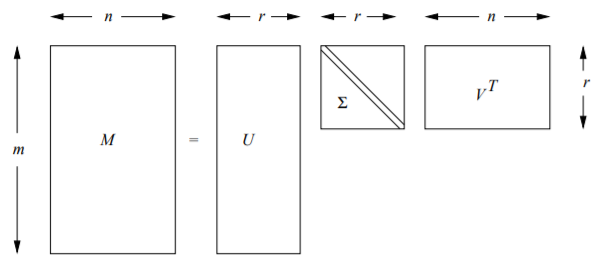

Чтобы узнать сколько можно оставить главных компонент можно пользоваться правилом 90%. 
$$\frac{\sum_{i=1}^{k} S_{ii}^{2}}{\sum_{i=1}^{r} S_{ii}^{2}}>90\%$$

## Как получать матрицы $U, S, V$

Для матрицы $U$ нужно найти eigenvectors $X*X^T$ и записать вектор столбец в матрицу, причем если кол-во векторов меньше кол-ва столбцов в матрице, то на диагонали пишем 1

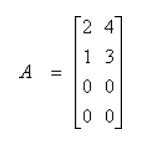

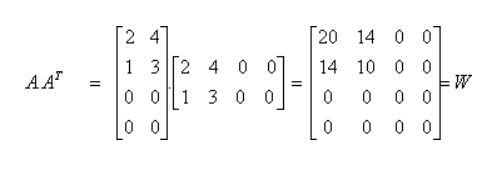

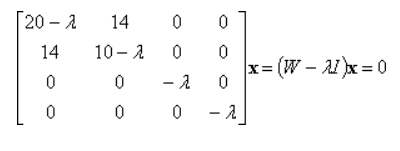

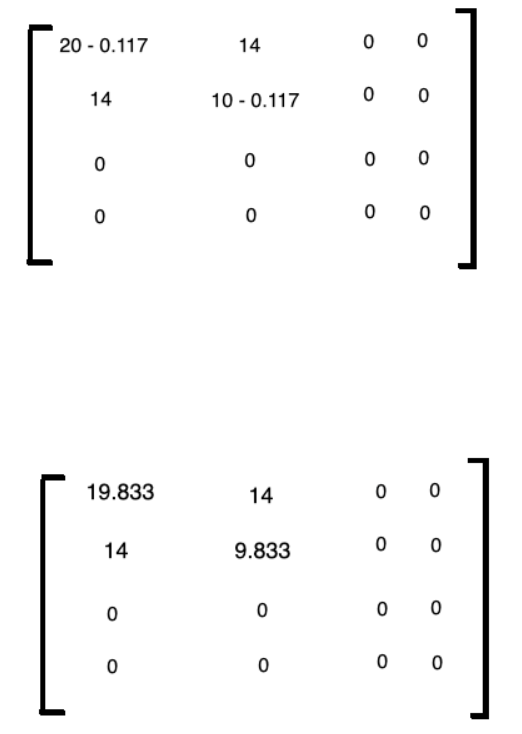

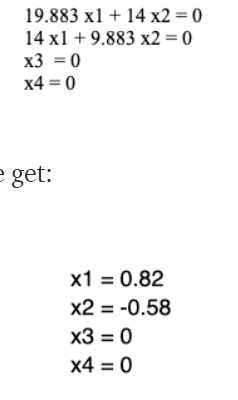

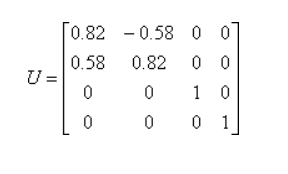

Тоже самое делаем для матрицы V только теперь берем $A^T*A$

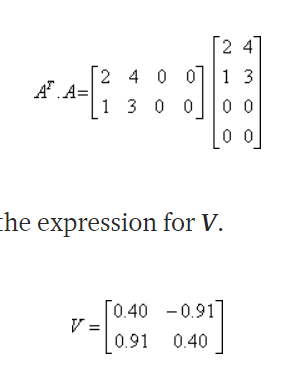

Матрица S это диагональная матрица, элементами которой являются корни из eigenvalues любой матрицы U или V
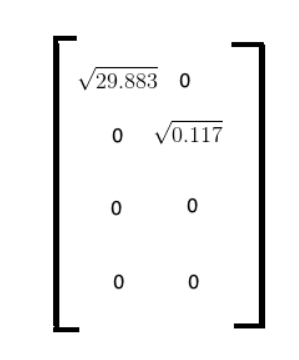

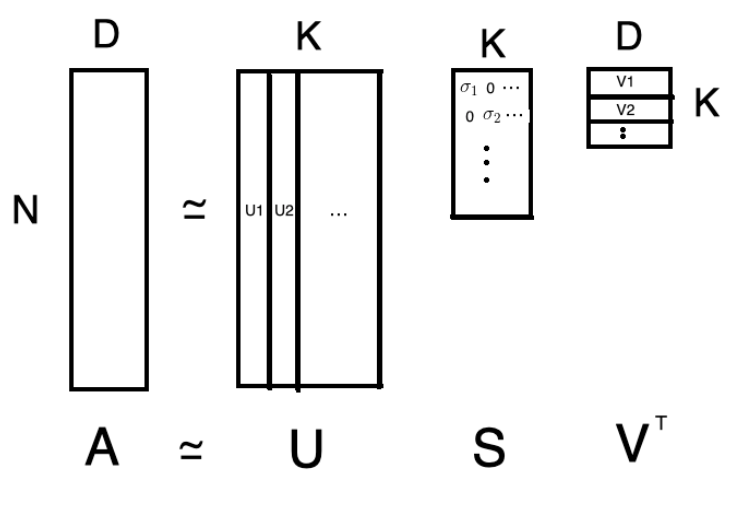

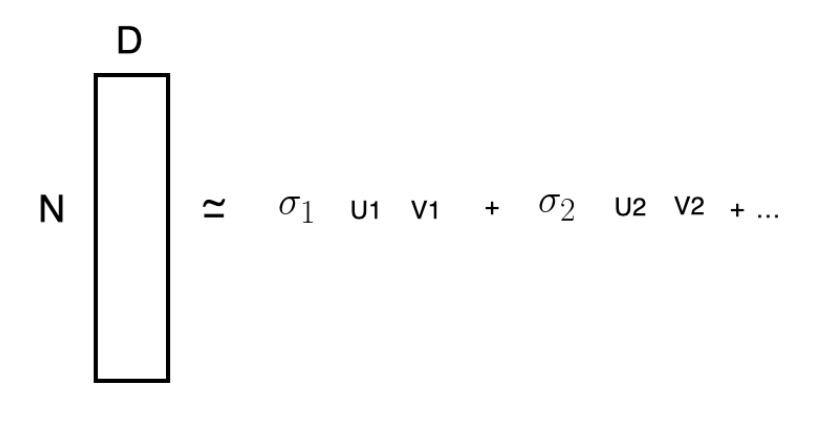

In [47]:
U1 = U.copy()
U1[:,1] = 0

U2 = U.copy()
U2[:,0] = 0

V1 = V.copy()
V1[1,:] = 0

V2 = V.copy()
V2[0,:] = 0

S1 = s[0]
S2 = s[1]

In [53]:
S1*U1.dot(V1) + S2*U2.dot(V2)

array([[-4.5       , -7.89773145],
       [-3.5       , -4.54150168],
       [-2.5       , -7.528756  ],
       [-1.5       , -4.98097017],
       [-0.5       , -2.71705763],
       [ 0.5       , -0.30174828],
       [ 1.5       ,  5.58137731],
       [ 2.5       ,  2.2625629 ],
       [ 3.5       ,  8.69318394],
       [ 4.5       , 11.43064106]])

In [59]:
X_df

,feature_1,feature_2
0,-4.5,-7.897731
1,-3.5,-4.541502
2,-2.5,-7.528756
3,-1.5,-4.980970
4,-0.5,-2.717058
5,0.5,-0.301748
6,1.5,5.581377
7,2.5,2.262563
8,3.5,8.693184
9,4.5,11.430641
